![](./img/sktime-logo-text-horizontal.jpg)

![](./img/Introslide-sktime.png)

# Content
1. Getting started with sktime (this notebook)
2. Forecasting Pipelines and Global Forecasting with sktime
3. Benchmarking with sktime

# Getting Started with sktime
sktime provides algorithms for:
* classification
* anomaly detection
* time series segmentation
* transformation
* regression
* forecasting


Interfaces are strongly inspired from sklearn and might differentiate only slightly depending on the task.

### Classification

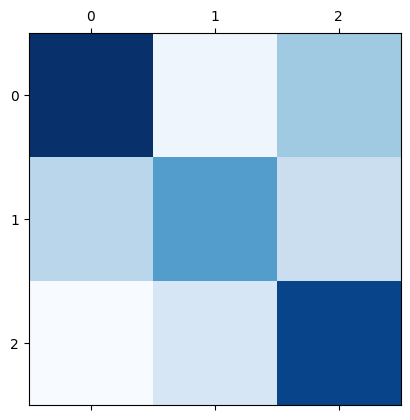

In [1]:
# Import necessary modules
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sktime.datasets import load_arrow_head
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

# Load dataset
X_train, y_train = load_arrow_head(split="train")
X_test, y_test = load_arrow_head(split="test")

# Create classifier
clf = TimeSeriesForestClassifier(n_estimators=5)

# Fit the classifier
clf.fit(X_train, y_train)

# Predict classes
y_pred = clf.predict(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)
plt.matshow(confusion_matrix, cmap=plt.cm.Blues)

### Anomaly Detection

<Axes: >

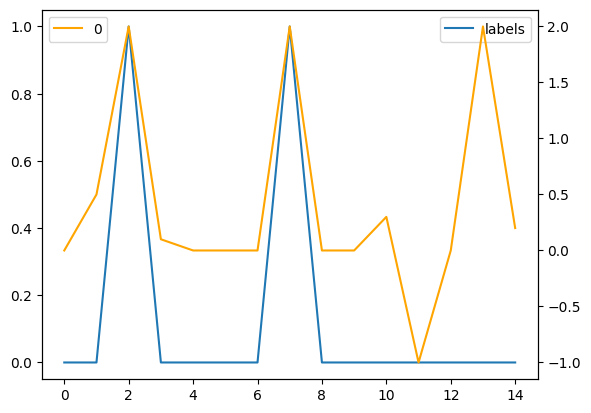

In [2]:
# Import necessary modules
import pandas as pd
from sktime.detection.lof import SubLOF

data = pd.Series([0, 0.5, 2, 0.1, 0, 0, 0, 2, 0, 0, 0.3, -1, 0, 2, 0.2])

# Instantiate outlier detection model
model = SubLOF(3, window_size=5, novelty=True)

# Do fit and transform in one step by calling fit_transform
ax = model.fit_transform(data).plot()
pd.DataFrame(data).plot(ax=ax.twinx(), color="orange")

### Forecasting

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

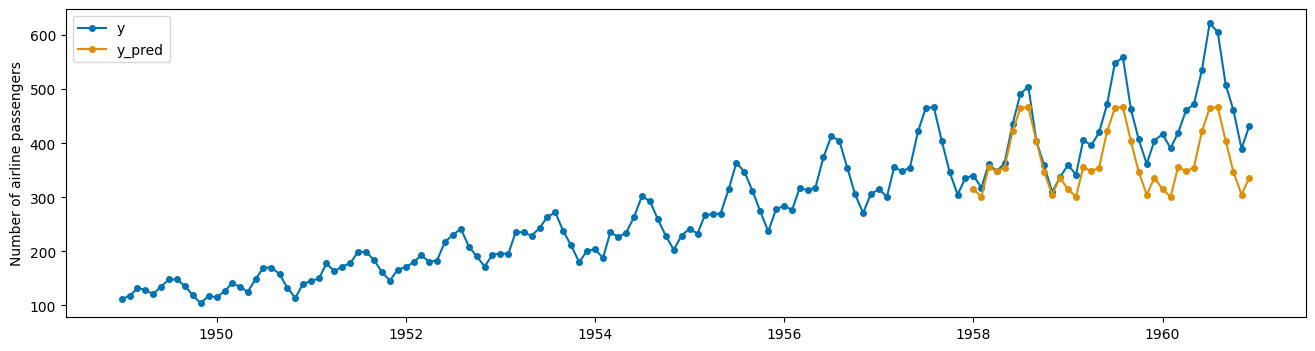

In [3]:
# Forecasting# Naive Forecaster with airline datset
from sktime.datasets import load_airline
from sktime.forecasting.naive import NaiveForecaster
from sktime.utils.plotting import plot_series


y = load_airline()


# specifying the forecasting algorithm
forecaster = NaiveForecaster(strategy="last", sp=12)

# fitting the forecaster
forecaster.fit(y[:-36])

# querying predictions
y_pred = forecaster.predict(fh=range(1,37))

# plotting predictions and past data
plot_series(y, y_pred, labels=["y", "y_pred"])